# **Olympics Data Analysis Using Pyspark**

## **Introduction:**

### **The Olympic Games are normally held every four years, alternating between the Summer and Winter Olympics every two years in the four-year period.**

### **The Given Data Set is having information from 2000 to 2012(Summer and Winter Olympics Data).**

### **It has information about all types of Sports and Conducted year,Country Athletic Names who participated in the Olympics and different medals won by each Athletic from different countries.For every events there are winners. Therefore various data is generated.**

### **Installing the pyspark**

In [1]:
!pip install pyspark #installing the pyspark module

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###**Importing SparkSession**

In [2]:
from pyspark.sql import SparkSession#importing the SparkSession from pyspark.sql
spark=SparkSession.builder.appName("project").getOrCreate()#Creating the SparkSession

In [3]:
spark#created SparkSession 

###**1)Write PySpark code to read olympix_data.csv file**

###**After cleaning the Olympic csv file using pandas librabry the new cleaned data is read below using spark.read.csv**

In [4]:
clean_data_file=spark.read.csv("/content/new_cdata_olympic.csv",header=True,inferSchema=True)#reading the Olympic Data set

In [5]:
clean_data_file.show(n=20,truncate=False)#It shows the first 20 rows in the data 

+---------------------+----+-------------+----+----------+--------------------+----------+------------+-----------+-----------+
|name                 |age |country      |year|Date_Given|sports              |gold_medal|silver_medal|brone_medal|total_medal|
+---------------------+----+-------------+----+----------+--------------------+----------+------------+-----------+-----------+
|Michael Phelps       |23.0|United States|2008|2008-08-24|Swimming            |8         |0           |0          |8          |
|Michael Phelps       |19.0|United States|2004|2004-08-29|Swimming            |6         |0           |2          |8          |
|Michael Phelps       |27.0|United States|2012|2012-08-12|Swimming            |4         |2           |0          |6          |
|Natalie Coughlin     |25.0|United States|2008|2008-08-24|Swimming            |1         |2           |3          |6          |
|Aleksey Nemov        |24.0|Russia       |2000|2000-10-01|Gymnastics          |2         |1           |3

In [6]:
clean_data_file.printSchema()

root
 |-- name: string (nullable = true)
 |-- age: double (nullable = true)
 |-- country: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- Date_Given: string (nullable = true)
 |-- sports: string (nullable = true)
 |-- gold_medal: integer (nullable = true)
 |-- silver_medal: integer (nullable = true)
 |-- brone_medal: integer (nullable = true)
 |-- total_medal: integer (nullable = true)



In [7]:
len(clean_data_file.columns)#It shows the columns i.e.,10

10

In [8]:
clean_data_file.count()#The no of rows are 8613

8613

###**Observation:**

###**It shows the first 20 rows in the data.**

###**2)Write PySpark code to print the Olympic Sports/games in the dataset.**


In [9]:
sports_games=clean_data_file.select("sports").distinct()#It shows the distinct sports in the data set

In [10]:
sports_games.show(n=20,truncate=False)

+-------------------------+
|sports                   |
+-------------------------+
|Gymnastics               |
|Tennis                   |
|Boxing                   |
|Short-Track Speed Skating|
|Ice Hockey               |
|Rowing                   |
|Judo                     |
|Softball                 |
|Sailing                  |
|Swimming                 |
|Alpine Skiing            |
|Basketball               |
|Handball                 |
|Rhythmic Gymnastics      |
|Biathlon                 |
|Triathlon                |
|Badminton                |
|Athletics                |
|Figure Skating           |
|Beach Volleyball         |
+-------------------------+
only showing top 20 rows



###**Observation:**

###**It shows the distinct sports in the data set.**

###**3)Write PySpark code to plot the total number of medals in  each Olympic Sport/game**


In [11]:
from pyspark.sql.functions import * #imporing all functons from pyspark.sql
import matplotlib.pyplot as plt # for data visualization
medals=clean_data_file.groupBy('sports').agg(sum("total_medal").alias("Total_no_of_medals")).sort(desc("Total_no_of_medals"))
#grouped the sports and aggregated the total_medal column and sorted it by descending order

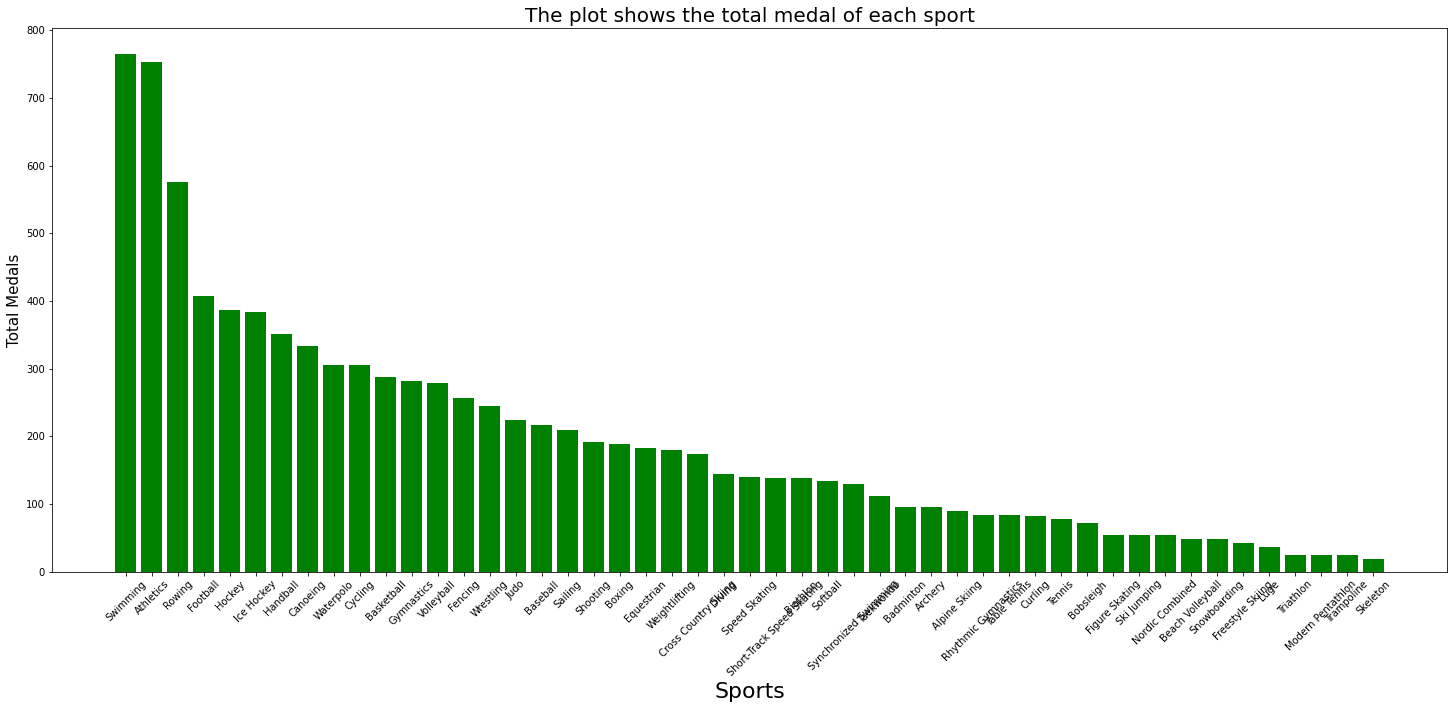

In [12]:
x=medals.toPandas()['sports'].values.tolist()#It is converting into pandas of sports column
y=medals.toPandas()['Total_no_of_medals'].values.tolist()#It is converting into pandas of Total_no_of_medals column
plt.figure(figsize=(25,10))#It returns the figuresize of the plot
plt.bar(x,y,color='green')
plt.title('The plot shows the total medal of each sport',fontsize=20)
plt.xlabel('Sports',fontsize=22)#It shows the label of x-axis 
plt.xticks(rotation=45)#It rotates x axis to 45 degree
plt.ylabel('Total Medals',fontsize=15)#It shows the label of y-axis
plt.show()#It shows the plot

###**Observation:**

###**It shows the top sports based on the medals.**

###**4)Sort the result based on the total number of medals?**

In [34]:
s=clean_data_file.groupBy('sports').agg(sum("total_medal").alias("Total_no_of_medals")).sort(desc("Total_no_of_medals"))#grouping the sports and summing up the total_medals

In [35]:
s.show(truncate=False)

+----------+------------------+
|sports    |Total_no_of_medals|
+----------+------------------+
|Swimming  |765               |
|Athletics |753               |
|Rowing    |576               |
|Football  |407               |
|Hockey    |386               |
|Ice Hockey|384               |
|Handball  |351               |
|Canoeing  |333               |
|Waterpolo |306               |
|Cycling   |306               |
|Basketball|287               |
|Gymnastics|282               |
|Volleyball|278               |
|Fencing   |256               |
|Wrestling |245               |
|Judo      |224               |
|Baseball  |216               |
|Sailing   |210               |
|Shooting  |192               |
|Boxing    |188               |
+----------+------------------+
only showing top 20 rows



###**Observation:**

###**Sorting the result based on the total number of medals and Swimming has toped first in total no of medals.**

###**5)Find the total number of medals won by each country in swimming**

In [15]:
swim=clean_data_file.filter("sports=='Swimming'")#It's filtering the sports 'Swimming'

In [16]:
c=swim.groupby('country').agg(sum("total_medal").alias("Total_no_of_medals")).sort(desc("Total_no_of_medals"))#grouping country and summing all medals and sorted it by Today_no_of_medals

In [17]:
c.show(truncate=False)

+-------------+------------------+
|country      |Total_no_of_medals|
+-------------+------------------+
|United States|267               |
|Australia    |163               |
|Netherlands  |46                |
|Japan        |43                |
|France       |39                |
|China        |35                |
|Germany      |32                |
|Russia       |20                |
|Italy        |16                |
|Great Britain|11                |
|South Africa |11                |
|Sweden       |9                 |
|Hungary      |9                 |
|Brazil       |8                 |
|Ukraine      |7                 |
|Zimbabwe     |7                 |
|Romania      |6                 |
|Canada       |5                 |
|South Korea  |4                 |
|Spain        |3                 |
+-------------+------------------+
only showing top 20 rows



###**Observation:**

###**The total number of medals won by each country in swimming is shown above.**

###**6)Find the total number of medals won by each country in Skeleton.**

In [18]:
skel=clean_data_file.filter("sports=='Skeleton'")#It's filtering the sports 'Skeleton'

In [19]:
c=skel.groupby('country').agg(sum("total_medal").alias("Today_no_of_medals")).sort('Today_no_of_medals')#grouping country and summing all medals and sorted it by Today_no_of_medals

In [20]:
c.show(truncate=False)#It shows all country sports of skeleton with all medals

+-------------+------------------+
|country      |Today_no_of_medals|
+-------------+------------------+
|Russia       |1                 |
|Austria      |1                 |
|Latvia       |1                 |
|Germany      |2                 |
|Great Britain|3                 |
|United States|3                 |
|Switzerland  |3                 |
|Canada       |4                 |
+-------------+------------------+



###**Observation:**

###**The total number of medals won by each country in Skeleton is show above.**

###**7)Find the number of medals that the US won yearly.**

In [21]:
united=clean_data_file.filter("country=='United States'")#It's filtering the country United States

In [22]:
c=united.groupby('year').agg(sum("total_medal").alias("Total_no_of_medals")).sort('year')#grouping year and summing all medals and sorted it by year

In [23]:
c.show(truncate=False)#It shows the yearly medals of united states

+----+------------------+
|year|Total_no_of_medals|
+----+------------------+
|2000|243               |
|2002|84                |
|2004|265               |
|2006|52                |
|2008|317               |
|2010|97                |
|2012|254               |
+----+------------------+



###**Observation:**

###**The number of medals that the US won yearly is shown above.**

###**8)Find the total number of medals won by each country.**


In [24]:
coun=clean_data_file.groupby('country').agg(sum("total_medal").alias("Total_no_of_medals"))#grouping the country and summing up the total medal

In [25]:
coun.show(n=20,truncate=False)#It shows the country along with total medals

+--------------+------------------+
|country       |Total_no_of_medals|
+--------------+------------------+
|Russia        |768               |
|Paraguay      |17                |
|Chinese Taipei|20                |
|Sweden        |181               |
|Eritrea       |1                 |
|Singapore     |7                 |
|Malaysia      |3                 |
|Turkey        |28                |
|Germany       |629               |
|Afghanistan   |2                 |
|Sudan         |1                 |
|France        |318               |
|Greece        |59                |
|Sri Lanka     |1                 |
|Algeria       |8                 |
|Togo          |1                 |
|Slovakia      |35                |
|Argentina     |139               |
|Belgium       |18                |
|Great Britain |322               |
+--------------+------------------+
only showing top 20 rows



###**Observation:**

###**The Russia has highest number of medals of 768.**

###**9)Who was the oldest athlete in the olympics?**

In [26]:
max=clean_data_file.agg({"age":"max"})#finding the maximum value of the age

In [27]:
max.show(n=1,truncate=False)#The maximum age is 61

+--------+
|max(age)|
+--------+
|61.0    |
+--------+



In [28]:
name_of_the_athlete=clean_data_file.select("name").filter(clean_data_file['age']==61.0)#finding the name of the athlete

In [29]:
name_of_the_athlete.show(n=1)#It shows the name of athlete

+----------+
|      name|
+----------+
|Ian Millar|
+----------+



###**Obsevation:**

###**The name of the athlete is Ian Millar.**

###**10)Which country was he/she from?**


In [30]:
max=clean_data_file.agg({"age":"max"})#finding the maximum value of the age

In [31]:
max.show(n=1,truncate=False)#The maximum age is 61

+--------+
|max(age)|
+--------+
|61.0    |
+--------+



In [32]:
country_name=clean_data_file.select("country").filter(clean_data_file['age']==61.0)#finding the country of the athlete

In [33]:
country_name.show(n=1,truncate=False)#It shows the country of athlete

+-------+
|country|
+-------+
|Canada |
+-------+



###**Observation:**

###T**he athlete is from the country Canada**.